Task #5
=======

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sps
import matplotlib.pyplot as plt
sns.set_theme()
import math

#_______________________________from task3______________________________________
def gen_normal(n):
    """Generates random sample [X1, X2,.. X_{n}] where Xi ~ N(0,1)"""
    eta = np.random.rand(2,n)
    r = -np.sqrt(-2*np.log(eta[0,:]))
    phi = 2*np.pi*eta[1,:]
    x = r * np.cos(phi)
    y = r * np.sin(phi)
    return np.array([x,y])
#_______________________________________________________________________________

#5.1
----
for $\{X_i\} \sim \mathcal{N}(\mu,\sigma^2)$ test
* LLN i.e $\dfrac{S_n}{n} = \dfrac{\sum_{i=1}^n X_i}{n} \rightarrow \mu 
\text{ as } n \rightarrow \infty,$

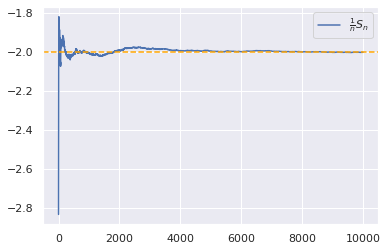

In [49]:
n,mu,sigma2 = 10000,-2,0.5
X = np.sqrt(sigma2)*gen_normal(n)[0,:] + mu

Sn = np.cumsum(X)
n = np.arange(1,n+1)
LLN = Sn/n
ax =sns.lineplot(x = n, y = LLN, label=r'$\frac{1}{n} S_n$')
ax.axhline(mu, ls='--', color='orange')
#CLT = (Sn - mu*n)/(sigma*np.sqrt(n))

* CLT i.e $\dfrac{S_n - \mu n}{\sigma \sqrt{n}} \xrightarrow{d} \eta \sim 
\mathcal{N}(0,1) \text{ as } n \rightarrow \infty.$

<AxesSubplot:xlabel='Value', ylabel='Density'>

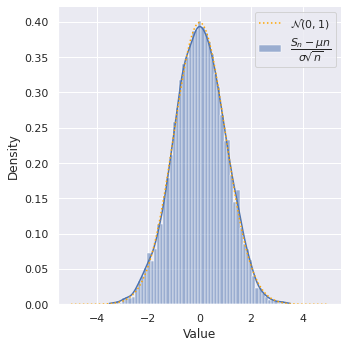

In [21]:
def gen_Sn(size,n,mu=0,sigma2=1):
    """Generates random sample [S1, S2,.. S_{size}] where Si -- sum of n 
    normally distributed random values"""
    X = np.sqrt(sigma2)*gen_normal(n*size)[0,:] + mu
    return np.sum(np.reshape(X,(size,n)),axis=1)

size,n,mu,sigma2 = 10000,1000,-2,0.5
data = (gen_Sn(size,n,mu,sigma2) - mu*n) / np.sqrt(sigma2*n)
graph = sns.displot({"Value": data}, x = "Value", stat="density",
                                kde=True, kde_kws={"bw_adjust": 1}, 
                                label=r'$\dfrac{S_n - \mu n}{\sigma \sqrt{n}}$')
sns.lineplot(x=np.linspace(-5, 5, 1000), y=sps.norm.pdf(np.linspace(-5, 5, 1000)), 
                            ls=':', color = "orange", label=r'$\mathcal{N}(0,1)$')
#graph.set_xlim([-5, 5]))

#5.2
----

#5.3
----